# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -o annotations_trainval2014.zip

--2022-09-07 06:55:24--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.162.121
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.162.121|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [2]:
!pip3 install -U scikit-image
!pip3 install -U cython 
!pip3 install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

    100% |████████████████████████████████| 25.5MB 45kB/s  eta 0:00:01
    100% |████████████████████████████████| 2.1MB 557kB/s eta 0:00:01
    100% |████████████████████████████████| 24.8MB 48kB/s  eta 0:00:01
    100% |████████████████████████████████| 4.4MB 273kB/s eta 0:00:01
Requirement already up-to-date: networkx>=1.8 in /usr/local/lib/python2.7/dist-packages (from scikit-image)
    100% |████████████████████████████████| 12.8MB 92kB/s  eta 0:00:01
    100% |████████████████████████████████| 17.0MB 70kB/s  eta 0:00:01
    100% |████████████████████████████████| 71kB 9.0MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 9.7MB/s ta 0:00:01
    100% |████████████████████████████████| 501kB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 9.8MB/s ta 0:00:01
    100% |████████████████████████████████| 583kB 2.1MB/s eta 0:00:01
  Found existing installation: Pillow 3.1.2
    Uni

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-build-jgol_8/pycocotools
  Running setup.py install for pycocotools ... done
You are using pip version 9.0.3, however version 22.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
# coco = COCO(instances_annFile)
coco = COCO('annotations/instances_{}.json'.format(dataType))

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
# coco_caps = COCO(captions_annFile)
coco_caps = COCO('annotations/captions_{}.json'.format(dataType))

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=5.80s)
creating index...
index created!
loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000489482.jpg


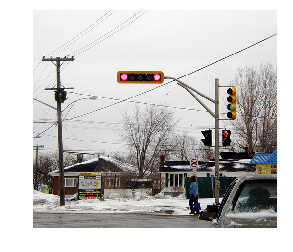

A woman walks across the street as a car waits at the traffic signal.
A person standing next to a traffic light.
Person crossing street outside in winter with stoplight.
A red light hangs above a snowy street
Someone waiting for the light to change so they can walk across the street. 


In [4]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)